In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from time import time
from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics.cluster import contingency_matrix

In [30]:
df = pd.read_csv('Synthetic_Movie_Lens/ratings.csv')  
print(df)
a = df['userId'].unique()
b = df['movieId'].unique()
columns =  sorted(a)
rows = sorted(b)

        Unnamed: 0  userId  movieId  rating   timestamp
0                0     496   112852     3.0  1415520462
1                1     391     1947     4.0  1030945141
2                2     387     1562     1.5  1095041022
3                3     474     2716     4.5  1053020930
4                4     483    88125     4.5  1311337237
...            ...     ...      ...     ...         ...
100831      100831     469     1219     4.0   965661925
100832      100832     599     3571     2.0  1498511343
100833      100833     414      276     3.0   961596299
100834      100834     395      168     3.0   841503984
100835      100835     288     2407     3.5  1054568795

[100836 rows x 5 columns]


In [31]:
R = pd.DataFrame(np.nan, index=rows, columns=columns)
for index, row in df.iterrows():
    R[(int(row['userId']))][int(row['movieId'])] = row['rating']

In [44]:
sparsity = (len(rows)*len(columns) - R.isna().sum().sum())/(len(rows)*len(columns))
print("Sparsity: %0.10f " % (sparsity))

Sparsity: 0.0169996831 


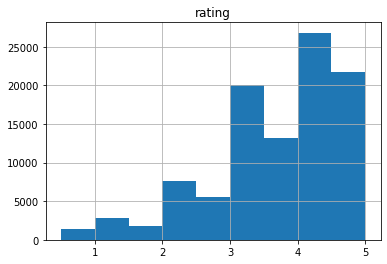

In [48]:
hist = df.hist(column= 'rating', bins=9)

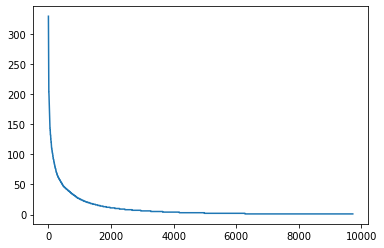

In [71]:
count = df['movieId'].value_counts()
plt.plot(count.values)

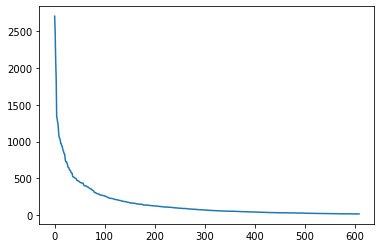

In [72]:
count = df['userId'].value_counts()
plt.plot(count.values)

(array([6.337e+03, 2.444e+03, 7.020e+02, 1.280e+02, 6.800e+01, 3.100e+01,
        7.000e+00, 4.000e+00, 3.000e+00]),
 array([0.    , 0.5625, 1.125 , 1.6875, 2.25  , 2.8125, 3.375 , 3.9375,
        4.5   , 5.0625]),
 <BarContainer object of 9 artists>)

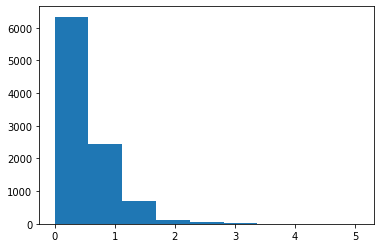

In [77]:
R.var(axis=1)
R_array = np.array(R)
R_var = np.nanvar(R_array, axis=1)
plt.hist(R_var, bins = 9)